#### Projeto 1 - Competição em Ciência de Dados
##### Aluno: Aline Fernanda 

O projeto utiliza os dados do problema [House
Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/) do Kaggle

In [45]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [47]:
#importando a base de treino
data = pd.read_csv('dados/train.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data.head(6)

Número de linhas e colunas: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [3]:
#importando a base de teste
data_t = pd.read_csv('dados/test.csv', header=(0))
print("Número de linhas e colunas:",data_t.shape)
data_t.head(6)

Número de linhas e colunas: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


### Análise Exploratória dos Dados

##### Análise da Target

##### Análise das features

In [9]:
#determinar quais variaveis são qualitativas e quantitativas
df_quanti = quantitative = [f for f in data.columns if data.dtypes[f] != 'object']
#remove a target e o ID dos imóveis
quantitative.remove('SalePrice')
quantitative.remove('Id')
df_quanli = qualitative = [f for f in data.columns if data.dtypes[f] == 'object']

In [10]:
#Quantitativas
print(df_quanti)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [11]:
#Qualitativas
print(df_quanli)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


<AxesSubplot:ylabel='Missing values (%)'>

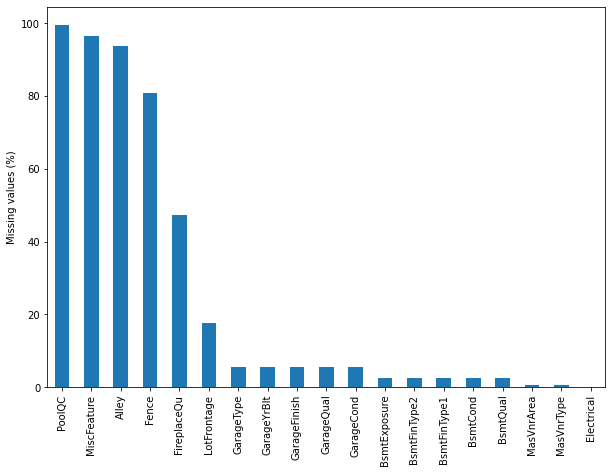

In [15]:
#verificar a quantidade percentual de missings
df_missing = data.isna().sum()[data.isna().sum() > 0].sort_values(ascending = False)/len(data)*100
df_missing.plot.bar(figsize = (10,7), ylabel = 'Missing values (%)')

A partir da Análise de porcentagem as variáveis PoolQC, MiscFeature, Alley, Fence e FireplaceQu foram acima de 50% de valores nulos. Essas targets podem ser optadas por serem deletadas da base ou mante-las trocando os missings por outra alteração. Nesse caso optei por excluir essas 5 variáveis. 

In [17]:
#deletando
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)

In [18]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [19]:
#Investigação da target


##### Questão 1
a) Proponha 3 novas variáveis explicativas que façam sentido do ponto de vista prático do problema

In [28]:
#arrumar as variaveis
data["YrSold"].where(data.YrSold > data.YearBuilt, data.YearBuilt, inplace=True)
data["GarageYrBlt"].where(data.GarageYrBlt > 2010, data.YearBuilt, inplace=True)
data["GarageYrBlt"].where(data.GarageYrBlt.isna(), data.YearBuilt, inplace=True)

In [22]:
#Idade do imóvel é melhor que utilizar ano de venda ou construção dado que o modelo podera ser utilizado futuramente
data["Age"] = data.YrSold.astype('float') - data.YearBuilt.astype('float')

In [29]:
#Tempo de reforma com a msma justificativa da idade do imovel dado que uma reforma recente pode valorizar o imovel
data["AgeRemod"] = data.YrSold.astype('float') - data.YearRemodAdd.astype('float')

b) Faça uma análise ilustrando a (possível) qualidade das variáveis propostas.